# Visualising Earnings Based On College Majors

This project will visually explore the graduate outcomes of students that graduated from college in the US between 2010 and 2012.

The data was released by the [American Comminity Survey (ACS)](https://www.census.gov/programs-surveys/acs/), then cleaned by FiverThirtyEight and uploaded to their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

The data dictionary is as follows:

- <strong>Rank</strong> - Rank by median earnings (the dataset is ordered by this column).
- <strong>Major_code</strong> - Major code.
- <strong>Major</strong> - Major name.
- <strong>Major_category</strong> - Category of major.
- <strong>Total</strong> - Total number of graduates per major.
- <strong>Sample_size</strong> - Sample size (unweighted) of full-time graduates.
- <strong>Men</strong> - Number of male graduates per major.
- <strong>Women</strong> - Number of female graduates per major.
- <strong>ShareWomen</strong> - Women as share of total.
- <strong>Employed</strong> - Number employed.
- <strong>Median</strong> - Median salary of full-time, year-round workers.
- <strong>Low_wage_jobs</strong> - Number in low-wage service jobs.
- <strong>Full_time</strong> - Number employed 35 hours or more.
- <strong>Part_time</strong> - Number employed less than 35 hours.

First the data will be imported into a dataframe and any rows with NaN values removed from the dataset. This will aid the the data visualisation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.iloc[:1]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193


In [3]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [5]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [6]:
raw_data_count = len(recent_grads.index)
raw_data_count

173

In [7]:
recent_grads = recent_grads.dropna()
cleaned_data_count = len(recent_grads.index)
cleaned_data_count

172

After the above cleaning, it can be seen that only one row was removed due to containing NaN values.

Text(0.5,1,'Sample Size vs Median Salary')

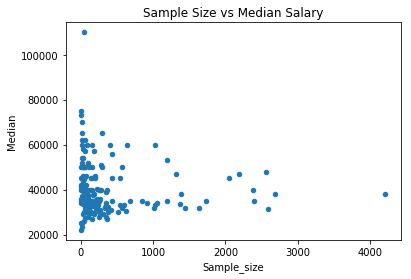

In [8]:
ax1 = recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
ax1.set_title('Sample Size vs Median Salary')

Looking at the plot above, there is no clear correlation between sample size for major and median graduate salary. However, there seems to be a much higher spread between majors with very small sample sizes. This is likely due to some of the more niche majors sometimes having very high salary prospects.

Text(0.5,1,'Sample Size vs Unemployment Rate')

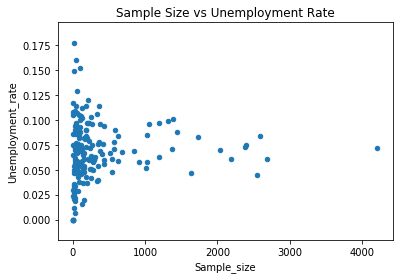

In [9]:
ax2 = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax2.set_title('Sample Size vs Unemployment Rate')

When is comes to sample size vs unemployment rate, the same can be said for the plot before. There is no clear correlation however the majors with much smaller sample sizes have a much larger spread in unemployment rate. This again will likely be due to the huge variability in employment prospects for more niche subjects.

Text(0.5,1,'No. Full Time Grads vs Median Salary')

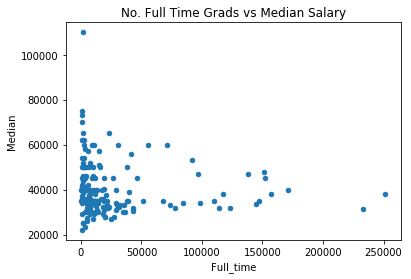

In [10]:
ax3 = recent_grads.plot(x='Full_time', y='Median', kind='scatter')
ax3.set_title('No. Full Time Grads vs Median Salary')

Text(0.5,1,'Proportion of Women Grads vs Unemployment Rate')

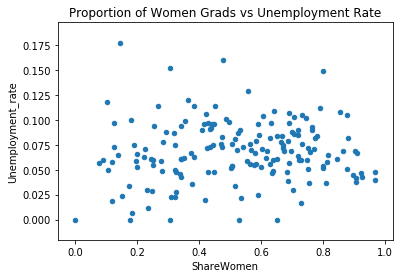

In [11]:
ax4 = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')
ax4.set_title('Proportion of Women Grads vs Unemployment Rate')

The plot above shows no correlation between the proportion of female graduates and unemployment rate of recent graduates.

Text(0.5,1,'No. Male Grads vs Median Salary')

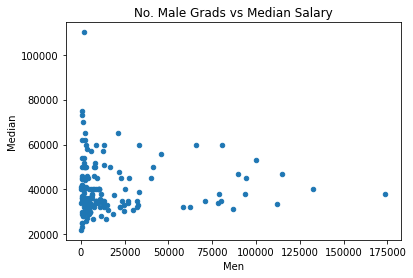

In [12]:
ax5 = recent_grads.plot(x='Men', y='Median', kind='scatter')
ax5.set_title('No. Male Grads vs Median Salary')

Text(0.5,1,'No. Female Grads vs Median Salary')

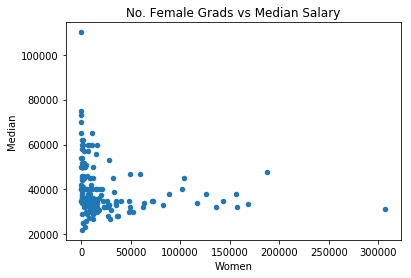

In [13]:
ax6 = recent_grads.plot(x='Women', y='Median', kind='scatter')
ax6.set_title('No. Female Grads vs Median Salary')

From the above two plots, it can be seen that there is no significant difference between male and female median graduate salary. However, in majors where there are either a large armount of male or female graduates, there is a slight trend towards there being a higher median salary for male graduates.

Text(0.5,1,'No. Female Graduates')

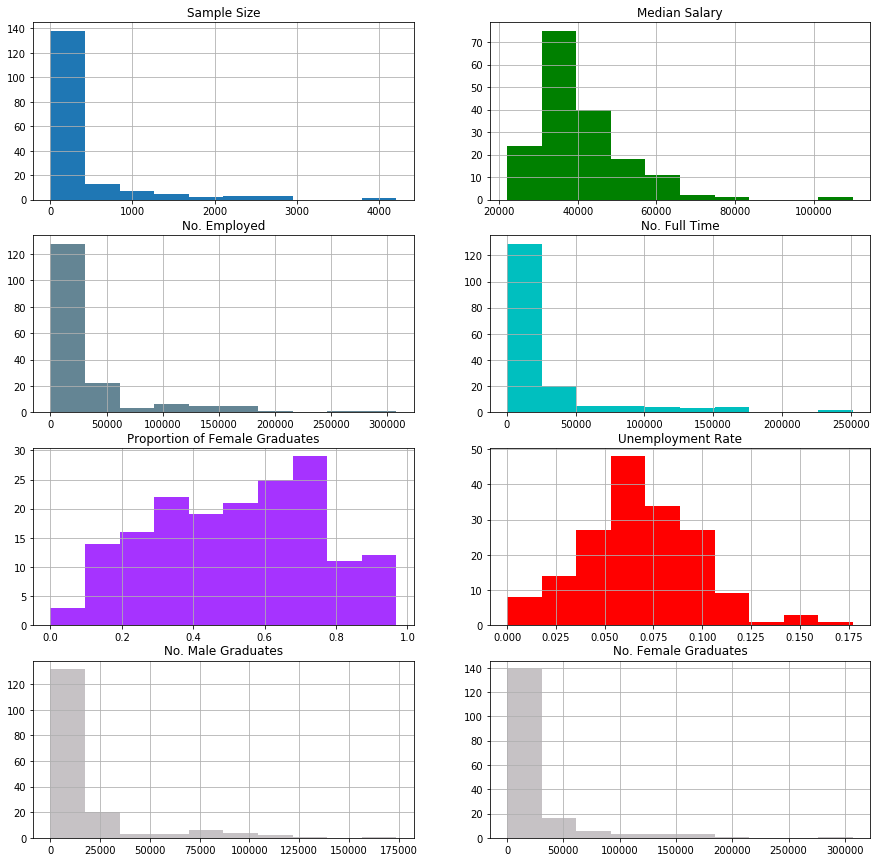

In [14]:
fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(4, 2, 1)
ax1 = recent_grads['Sample_size'].hist()
ax1.set_title('Sample Size')

ax2 = fig.add_subplot(4, 2, 2)
ax2 = recent_grads['Median'].hist(color='g')
ax2.set_title('Median Salary')

ax3 = fig.add_subplot(4, 2, 3)
ax3 = recent_grads['Employed'].hist(color='#648594')
ax3.set_title('No. Employed')

ax4 = fig.add_subplot(4, 2, 4)
ax4 = recent_grads['Full_time'].hist(color='c')
ax4.set_title('No. Full Time')

ax5 = fig.add_subplot(4, 2, 5)
ax5 = recent_grads['ShareWomen'].hist(color='#A633FF')
ax5.set_title('Proportion of Female Graduates')

ax6 = fig.add_subplot(4, 2, 6)
ax6 = recent_grads['Unemployment_rate'].hist(color='r')
ax6.set_title('Unemployment Rate')

ax7 = fig.add_subplot(4, 2, 7)
ax7 = recent_grads['Men'].hist(color='#C6C2C5')
ax7.set_title('No. Male Graduates')

ax8 = fig.add_subplot(4, 2, 8)
ax8 = recent_grads['Women'].hist(color='#C6C2C5')
ax8.set_title('No. Female Graduates')

Text(0.5,1,'No. Female Graduates')

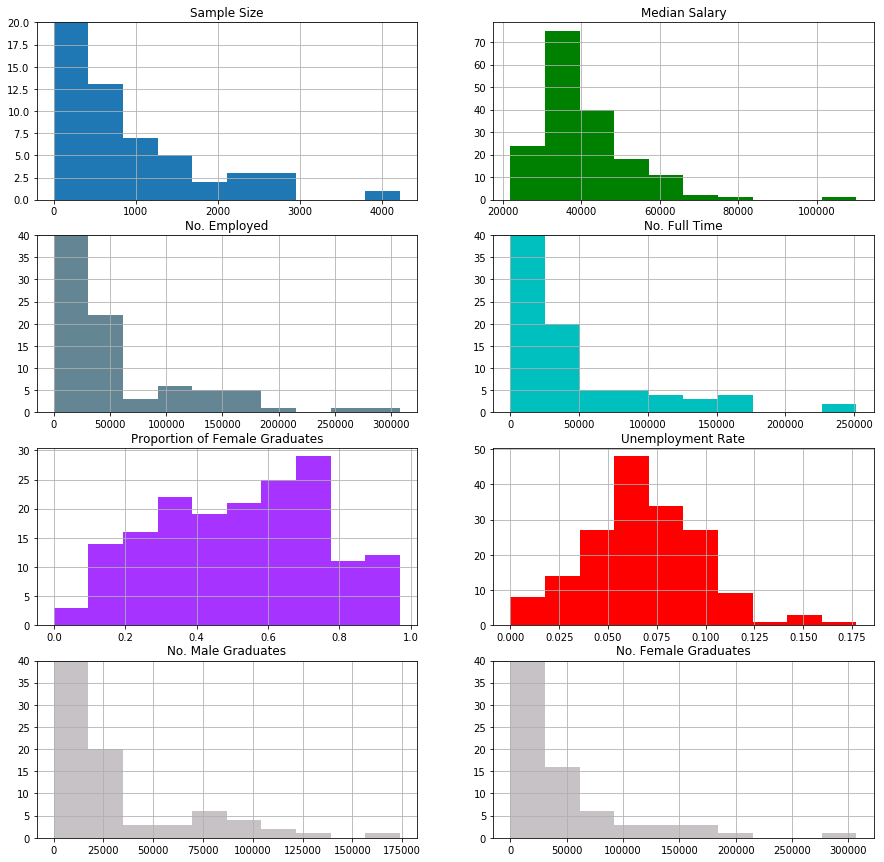

In [15]:
fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(4, 2, 1)
ax1 = recent_grads['Sample_size'].hist()
ax1.set_ylim(0, 20)
ax1.set_title('Sample Size')

ax2 = fig.add_subplot(4, 2, 2)
ax2 = recent_grads['Median'].hist(color='g')
ax2.set_title('Median Salary')

ax3 = fig.add_subplot(4, 2, 3)
ax3 = recent_grads['Employed'].hist(color='#648594')
ax3.set_ylim(0, 40)
ax3.set_title('No. Employed')

ax4 = fig.add_subplot(4, 2, 4)
ax4 = recent_grads['Full_time'].hist(color='c')
ax4.set_ylim(0, 40)
ax4.set_title('No. Full Time')

ax5 = fig.add_subplot(4, 2, 5)
ax5 = recent_grads['ShareWomen'].hist(color='#A633FF')
ax5.set_title('Proportion of Female Graduates')

ax6 = fig.add_subplot(4, 2, 6)
ax6 = recent_grads['Unemployment_rate'].hist(color='r')
ax6.set_title('Unemployment Rate')

ax7 = fig.add_subplot(4, 2, 7)
ax7 = recent_grads['Men'].hist(color='#C6C2C5')
ax7.set_ylim(0, 40)
ax7.set_title('No. Male Graduates')

ax8 = fig.add_subplot(4, 2, 8)
ax8 = recent_grads['Women'].hist(color='#C6C2C5')
ax8.set_ylim(0, 40)
ax8.set_title('No. Female Graduates')

From the histograms above, it can be seen that:

- Most majors had a sample size < 500
- The most common median salary for majors are between \$30000 and \$40000
- The most common unemployment rate for majors is around 6%
- There are more majors that are predominantly female. The most common proportion of female graduates was around 70-80%.

In [16]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000AB3DF98>,
      dtype=object)

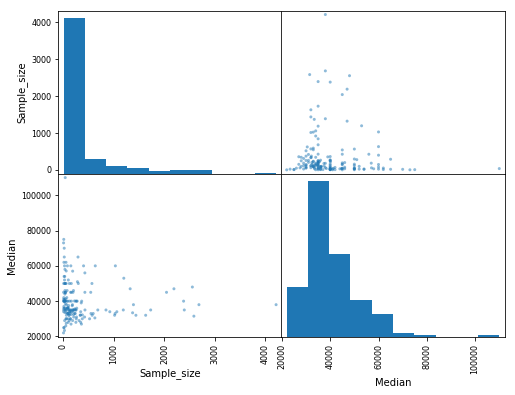

In [17]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(8, 6))

From the above scatter matrix plot, it can be seen that the larger the sample size, the closer to the the more common graduate salaries, as expected. Majors with an exceptionally large median salary have a very small sample size, likely due to the difficulty, competitiveness and nicheness of the major.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B3410B8>,
      dtype=object)

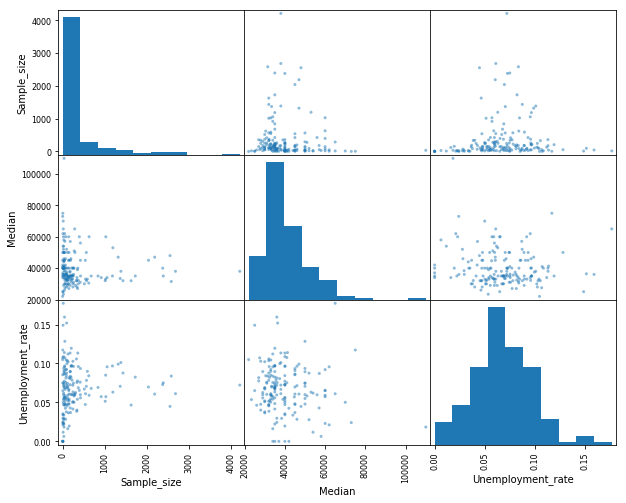

In [18]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,8))

The above scatter matrix shows that in addition to the trends between sample size and median salary, there is little correlation evident between unemployment rate and median salary or sample size. However, there is a huge amount more variation in unemployment rate when the sample size is very small. This is likely due to how one student's graduate outcome will affect a small sample and that graduate salary differ widely between niche majors.

Comparing Proportion of Female Graduates 

Text(0,0.5,'ShareWomen')

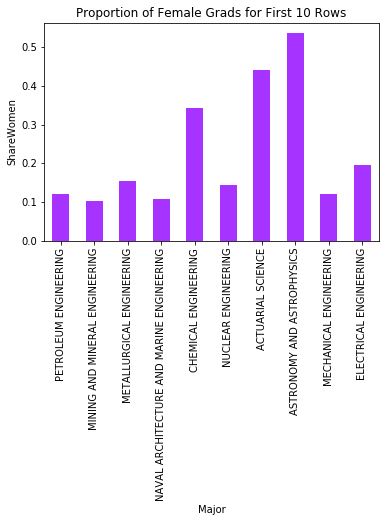

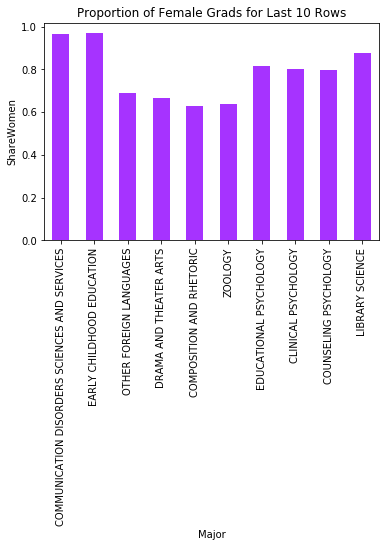

In [19]:
ax1 = recent_grads[:10].plot.bar(x='Major', y='ShareWomen', color='#A633FF', legend=False)
ax1.set_title('Proportion of Female Grads for First 10 Rows')
ax1.set_ylabel('ShareWomen')

ax2 = recent_grads[-10:].plot.bar(x='Major', y='ShareWomen', color='#A633FF', legend=False)
ax2.set_title('Proportion of Female Grads for Last 10 Rows')
ax2.set_ylabel('ShareWomen')

After examining the 10 highest and lowest ranked majors and visualising the `ShareWomen` per major (row), it can be seen that among the top 10, Women are underrepresented in all except Astronomy and Astrophysics where ShareWomen is greater than 0.5 (majority). Acturrial Science also has a large proportion of Female grads, despite not being majority female (~0.45).

Among the bottom 10 ranked majors, there is a large female majority among all majors in question. This ranges from around 0.6 (Composition and Rhetoric) up to almost 1.0 (Early Childhood Education). 

When examining the top and bottom majors more thoroughly, it can be concluded that Women appear to be disproportionately underrepresended in the engineering majors and make up a much higher proportion in other majors.

Text(0,0.5,'Unemployment Rate')

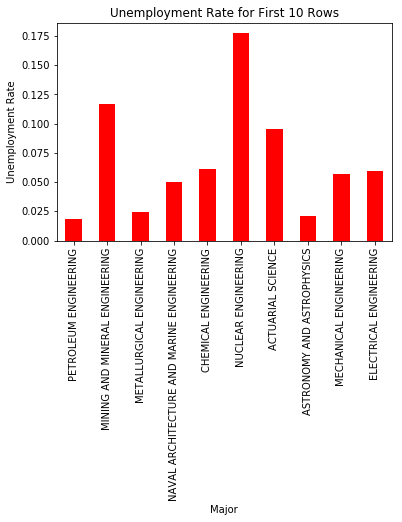

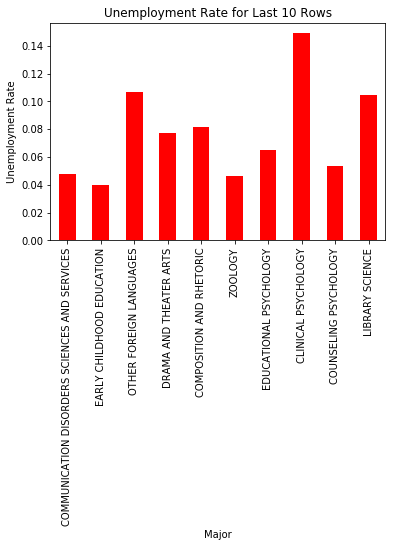

In [20]:
ax1 = recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', color='r', legend=False)
ax1.set_title('Unemployment Rate for First 10 Rows')
ax1.set_ylabel('Unemployment Rate')

ax2 = recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate', color='r', legend=False)
ax2.set_title('Unemployment Rate for Last 10 Rows')
ax2.set_ylabel('Unemployment Rate')

From above, it can be seen that when comparing the unemployment rate between the top 10 and bottom 10 majors, there is no clear trend. There are, however, specific instances where there is a much higher unemployment rate for majors when compared to the others. An example within the top 10 is Nuclear Engineer (ranked 6th). It has an unemployment rate of ~0.175 when the rest of the top 10 have an unemployment rate of ~0.025-0.100. Likewise, Clinical Psychology (ranked 171st) has an unemployment rate of ~0.15 when the rest in the bottom 10 have an unemployment rate ~0.04-0.1.